In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series , DataFrame
%matplotlib inline

In [218]:
start_date = "2016-01-01"
end_date = "2016-11-01"
dates = pd.date_range(start_date,end_date)
print dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01'],
              dtype='datetime64[ns]', length=306, freq='D')


In [219]:
df1 = pd.DataFrame(index=dates)

In [220]:
import os
os.chdir('C:\Python developments\python for Finance\Indian Market')

In [221]:
infy = pd.read_csv('infy.csv',index_col = 'Date', parse_dates = True,na_values = ['nan'])
sensex = pd.read_csv('sensex.csv',index_col = 'Date', parse_dates = True,na_values = ['nan'])

In [222]:
infy.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-11-01,1009.84998,1009.84998,986.00000,988.84998,230300,988.84998
2016-10-31,997.45001,997.45001,997.45001,997.45001,0,997.45001
2016-10-28,1007.00000,1009.79999,994.00000,997.45001,236700,997.45001
2016-10-27,1015.90002,1019.79999,1004.34998,1006.15002,121800,1006.15002
2016-10-26,1020.00000,1020.59998,1010.09998,1014.84998,142700,1014.84998


In [223]:
sensex.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-11-01,27966.179688,28029.800781,27845.630859,27876.609375,10100,27876.609375
2016-10-28,27983.140625,28000.140625,27789.839844,27941.509766,11300,27941.509766
2016-10-27,27808.630859,27958.130859,27665.599609,27915.900391,13600,27915.900391
2016-10-26,28050.550781,28050.550781,27759.560547,27836.509766,14100,27836.509766
2016-10-25,28159.089844,28211.410156,28013.689453,28091.419922,11000,28091.419922


In [224]:
infy = infy.dropna()
sensex = sensex.dropna()

In [225]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 2016-11-01 to 2016-01-01
Data columns (total 6 columns):
Open         218 non-null float64
High         218 non-null float64
Low          218 non-null float64
Close        218 non-null float64
Volume       218 non-null int64
Adj Close    218 non-null float64
dtypes: float64(5), int64(1)
memory usage: 11.9 KB


In [226]:
sensex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2016-11-01 to 2016-01-04
Data columns (total 6 columns):
Open         203 non-null float64
High         203 non-null float64
Low          203 non-null float64
Close        203 non-null float64
Volume       203 non-null int64
Adj Close    203 non-null float64
dtypes: float64(5), int64(1)
memory usage: 11.1 KB


In [227]:
infy.describe()

,Open,High,Low,Close,Volume,Adj Close
count,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.000000
mean,1129.243348,1138.937845,1117.424088,1127.569726,2.507266e+05,1120.526484
std,73.150223,74.197814,72.622580,73.305088,4.983040e+05,69.127345
min,997.450010,997.450010,986.000000,988.849980,0.000000e+00,988.849980
25%,1056.500000,1063.512543,1047.774998,1057.212498,9.032500e+04,1055.424988
50%,1138.000000,1152.950010,1127.849975,1136.200010,1.321500e+05,1123.124975
75%,1191.750000,1195.612550,1176.524962,1189.462525,2.290250e+05,1181.136245
max,1270.000000,1278.000000,1263.449950,1267.099980,5.832000e+06,1252.518580


In [228]:
sensex.describe()

,Open,High,Low,Close,Volume,Adj Close
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,26368.099176,26486.048982,26194.161118,26337.796336,13266.995074,26337.796336
std,1639.285954,1621.878604,1672.518232,1644.000747,5192.468302,1644.000747
min,23060.390625,23142.960938,22494.609375,22951.830078,6700.000000,22951.830078
25%,24973.939453,25034.190430,24807.139649,24892.025391,10350.000000,24892.025391
50%,26468.269531,26583.330078,26314.910156,26524.550781,12200.000000,26524.550781
75%,27990.214843,28086.390625,27776.495118,27941.809571,14600.000000,27941.809571
max,29062.900391,29077.279297,28911.310547,29045.279297,58900.000000,29045.279297


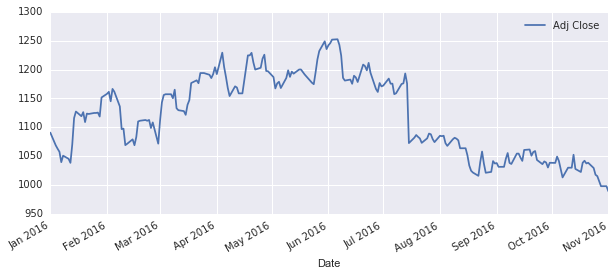

In [229]:
infy['Adj Close'].plot(legend=True,figsize = (10,4))

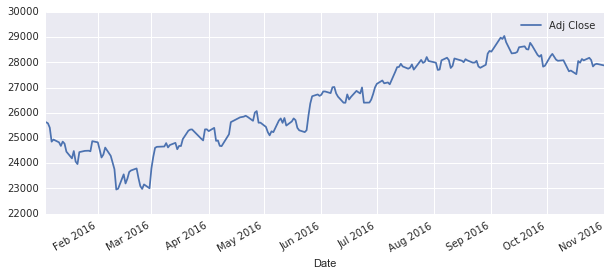

In [230]:
sensex['Adj Close'].plot(legend=True,figsize = (10,4))

In [231]:
ma_day = [10,20,30,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    infy[column_name] = pd.rolling_mean(infy['Adj Close'],ma)
    sensex[column_name] = pd.rolling_mean(sensex['Adj Close'],ma)

C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_me

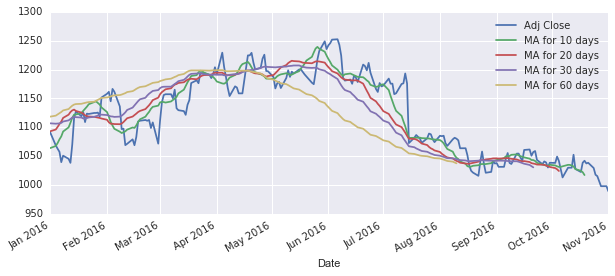

In [232]:
infy[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 60 days']].plot(subplots=False,figsize=(10,4))

## There is an overall downward trend for infy. Let us see the trend for Sensex.

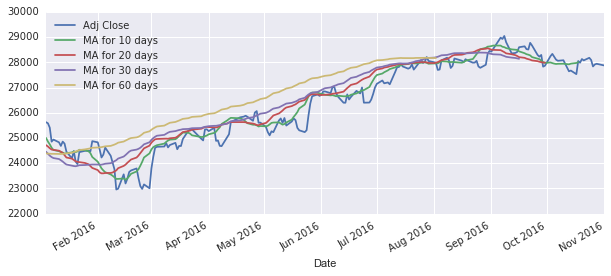

In [233]:
sensex[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 60 days']].plot(subplots=False,figsize=(10,4))

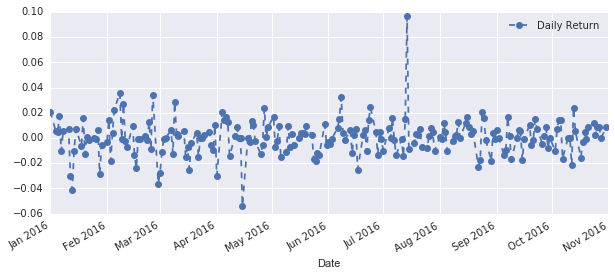

In [234]:
infy['Daily Return'] = infy['Adj Close'].pct_change()

infy['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

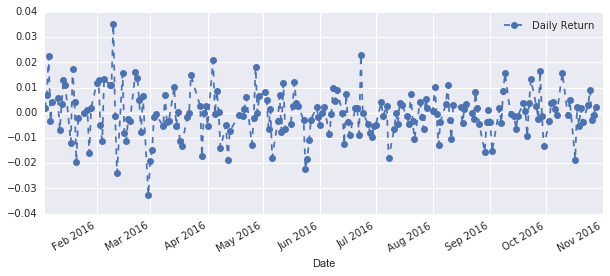

In [235]:
sensex['Daily Return'] = sensex['Adj Close'].pct_change()

sensex['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [236]:
import seaborn as sns

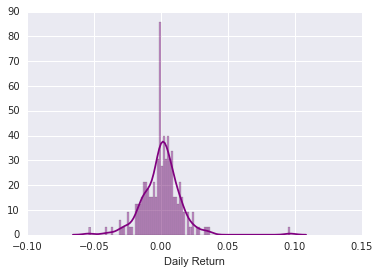

In [237]:
sns.distplot(infy['Daily Return'].dropna(),bins=100,color = 'purple')

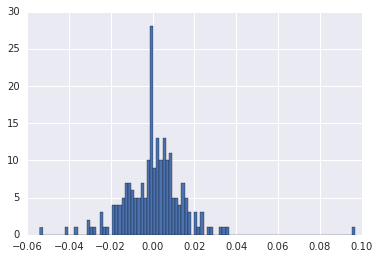

In [238]:
infy['Daily Return'].hist(bins=100)

In [239]:
infy_selected = infy[['Adj Close']]

In [240]:
infy_selected.head()

,Adj Close
Date,
2016-11-01,988.84998
2016-10-31,997.45001
2016-10-28,997.45001
2016-10-27,1006.15002
2016-10-26,1014.84998


In [241]:
returns = infy_selected.pct_change()

In [242]:
returns.head()

,Adj Close
Date,
2016-11-01,NaN
2016-10-31,0.008697
2016-10-28,0.000000
2016-10-27,0.008722
2016-10-26,0.008647


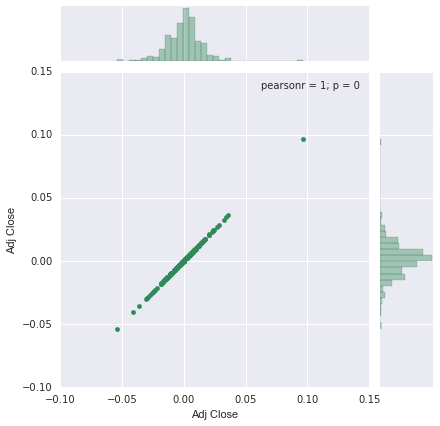

In [243]:
import seaborn as sns
sns.jointplot('Adj Close','Adj Close',returns, kind= 'scatter', color = 'seagreen')

In [244]:
infy_selected = infy_selected.rename(columns = {'Adj Close':'Infosys'})

In [245]:
infy_selected.head()

,Infosys
Date,
2016-11-01,988.84998
2016-10-31,997.45001
2016-10-28,997.45001
2016-10-27,1006.15002
2016-10-26,1014.84998


In [246]:
sensex_selected = sensex[['Adj Close']].rename(columns = {'Adj Close':'Sensex'})

In [247]:
stock = sensex_selected.join(infy_selected)
stock.head()

,Sensex,Infosys
Date,,
2016-11-01,27876.609375,988.84998
2016-10-28,27941.509766,997.45001
2016-10-27,27915.900391,1006.15002
2016-10-26,27836.509766,1014.84998
2016-10-25,28091.419922,1017.34998


In [248]:
stock_return = stock.pct_change()

In [249]:
stock_return.head()

,Sensex,Infosys
Date,,
2016-11-01,NaN,NaN
2016-10-28,0.002328,0.008697
2016-10-27,-0.000917,0.008722
2016-10-26,-0.002844,0.008647
2016-10-25,0.009157,0.002463


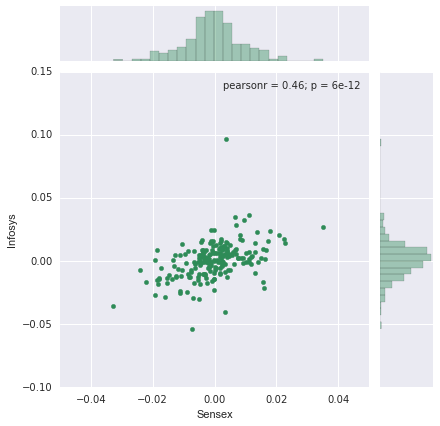

In [250]:
sns.jointplot('Sensex','Infosys',stock_return, kind= 'scatter', color = 'seagreen')

## Two outliers may be changing the co-relationship between Sensex and Infy upto some extent. Overall corelationship of 0.5 is found.

## Let us selected few more companies like TCS and Wipro. Probably, we can observe a trend of IT companies.

In [251]:
TCS = pd.read_csv('TCS.csv',index_col = 'Date', parse_dates = True,na_values = ['nan'])
Wipro = pd.read_csv('Wipro.csv',index_col = 'Date', parse_dates = True,na_values = ['nan'])

In [252]:
tcs_selected = TCS[['Adj Close']]
wipro_selected = Wipro[['Adj Close']]
tcs_selected = tcs_selected.rename(columns = {'Adj Close':'TCS'})
wipro_selected = wipro_selected.rename(columns = {'Adj Close':'Wipro'})
tcs_selected.head()

,TCS
Date,
2016-11-01,2347.70
2016-10-31,2399.25
2016-10-28,2399.25
2016-10-27,2413.25
2016-10-26,2396.95


In [253]:
wipro_selected.head()

,Wipro
Date,
2016-11-01,460.89999
2016-10-31,461.70001
2016-10-28,461.70001
2016-10-27,462.64999
2016-10-26,472.39999


In [254]:
stock = stock.join(tcs_selected)

In [255]:
stock = stock.join(wipro_selected)

In [256]:
stock.head()

,Sensex,Infosys,TCS,Wipro
Date,,,,
2016-11-01,27876.609375,988.84998,2347.70,460.89999
2016-10-28,27941.509766,997.45001,2399.25,461.70001
2016-10-27,27915.900391,1006.15002,2413.25,462.64999
2016-10-26,27836.509766,1014.84998,2396.95,472.39999
2016-10-25,28091.419922,1017.34998,2398.65,481.25000


In [257]:
stock_return = stock.pct_change()

## Let us analyse the relationship between daily_returns of companies.

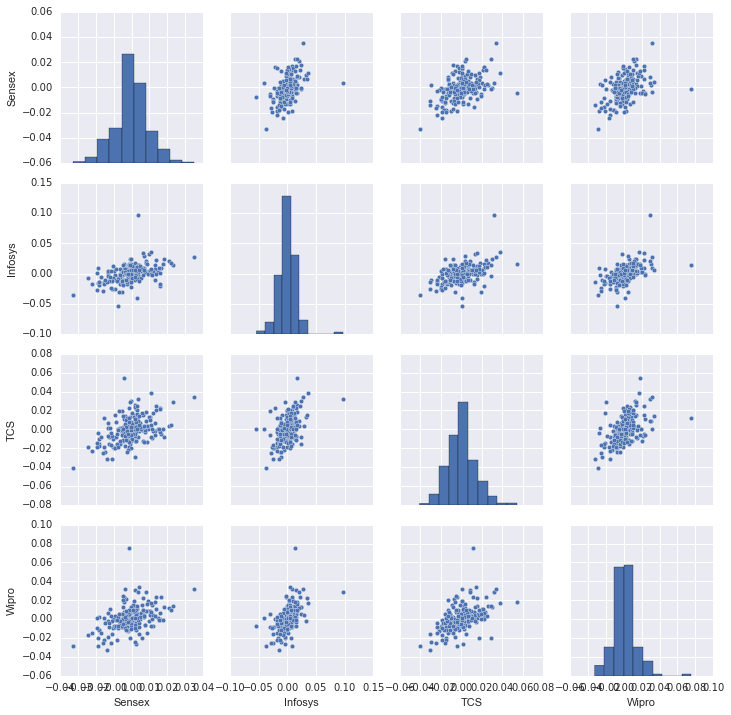

In [258]:
sns.pairplot(stock_return.dropna())

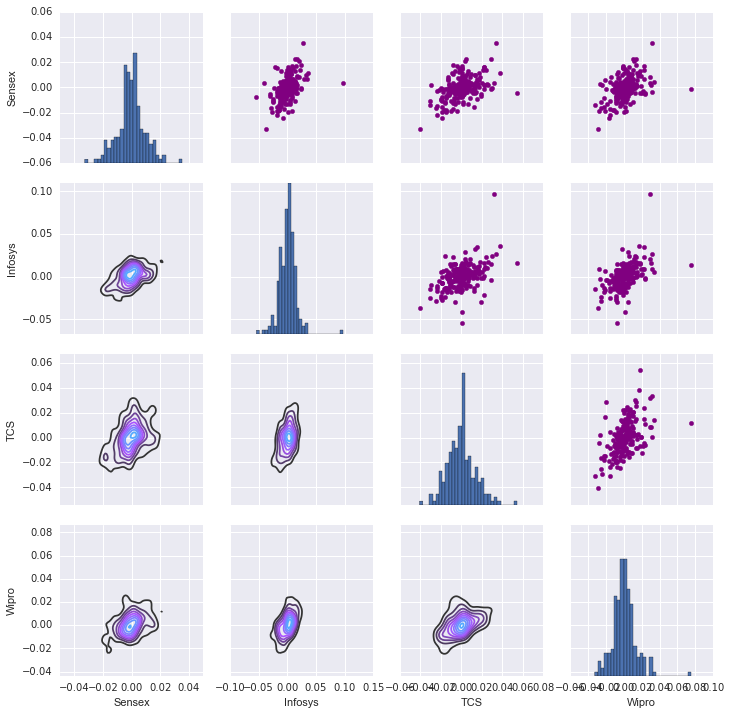

In [259]:
returns_fig = sns.PairGrid(stock_return.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

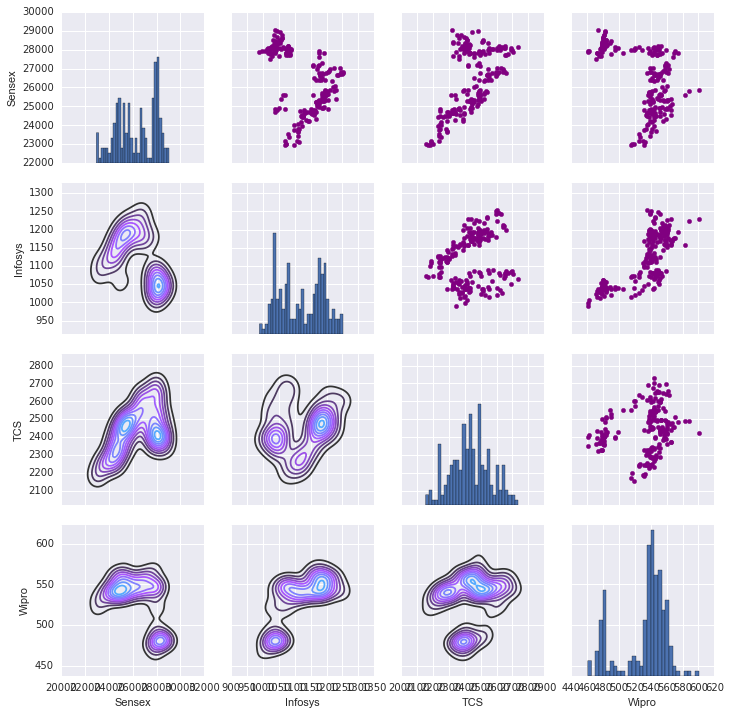

In [260]:
returns_fig = sns.PairGrid(stock)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

## Compare all the stock returns

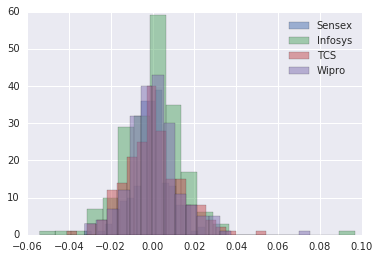

In [261]:
stock_return['Sensex'].hist(bins=20,alpha = 0.5,label='Sensex')
stock_return['Infosys'].hist(bins=20,alpha = 0.5,label='Infosys')
stock_return['TCS'].hist(bins=20,alpha = 0.5,label='TCS')
stock_return['Wipro'].hist(bins=20,alpha = 0.5,label='Wipro')
plt.legend(loc='upper right')
plt.show()

## Value at Risk calculation

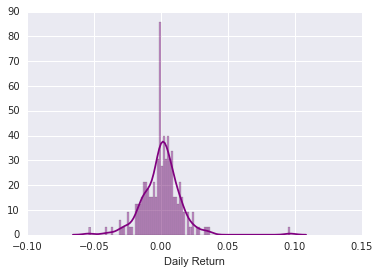

In [262]:
sns.distplot(infy['Daily Return'].dropna(),bins=100,color='purple')

In [263]:
stock_return['Infosys'].quantile(0.05)

-0.022871102607462418

In [264]:
days = 365

dt = 1./days

mu = stock_return.mean()['Infosys']

sigma = stock_return.std()['Infosys']

In [265]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [266]:
infy.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 30 days,MA for 60 days,Daily Return
Date,,,,,,,,,,,
2016-11-01,1009.84998,1009.84998,986.00000,988.84998,230300,988.84998,NaN,NaN,NaN,NaN,NaN
2016-10-31,997.45001,997.45001,997.45001,997.45001,0,997.45001,NaN,NaN,NaN,NaN,0.008697
2016-10-28,1007.00000,1009.79999,994.00000,997.45001,236700,997.45001,NaN,NaN,NaN,NaN,0.000000
2016-10-27,1015.90002,1019.79999,1004.34998,1006.15002,121800,1006.15002,NaN,NaN,NaN,NaN,0.008722
2016-10-26,1020.00000,1020.59998,1010.09998,1014.84998,142700,1014.84998,NaN,NaN,NaN,NaN,0.008647


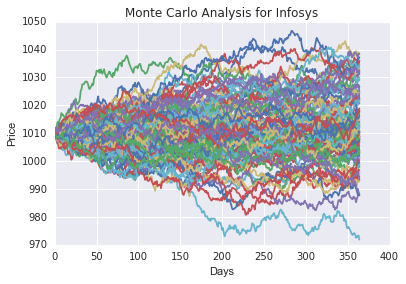

In [267]:
start_price = 1009.85

for run in xrange(100):
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Infosys')

In [268]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

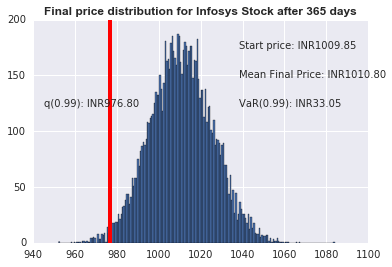

In [269]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

# starting price
plt.figtext(0.6,0.8,s='Start price: INR%.2f' %start_price)

# Mean ending price

plt.figtext(0.6,0.7, "Mean Final Price: INR%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)

plt.figtext(0.6,0.6, "VaR(0.99): INR%.2f" %(start_price -q,))

# Display 1% quantile

plt.figtext(0.15,0.6, "q(0.99): INR%.2f" %q)

# Plot a line at the 1% quantile result

plt.axvline(x=q,linewidth = 4, color = 'r')

# Title

plt.title(u"Final price distribution for Infosys Stock after %s days" % days, weight ='bold');

### The value at risk at 0.99 level is INR 33.64. 

## Let us start comparing the stocks to discover an overall trend.

In [270]:
stock.head()

,Sensex,Infosys,TCS,Wipro
Date,,,,
2016-11-01,27876.609375,988.84998,2347.70,460.89999
2016-10-28,27941.509766,997.45001,2399.25,461.70001
2016-10-27,27915.900391,1006.15002,2413.25,462.64999
2016-10-26,27836.509766,1014.84998,2396.95,472.39999
2016-10-25,28091.419922,1017.34998,2398.65,481.25000


In [271]:
def plot_data(df, title = 'Stock Price'):
    ax = df.plot(title=title,fontsize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.figure(figsize = (50,20))
    plt.show()

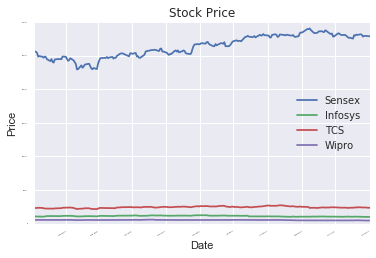

In [272]:
plot_data(stock)

In [273]:
df1 = df1.join(stock).dropna()

In [274]:
df1.head()


,Sensex,Infosys,TCS,Wipro
2016-01-04,25623.349609,1068.16477,2339.367,551.89675
2016-01-05,25580.339844,1062.43158,2314.600,550.95704
2016-01-06,25406.330078,1057.14305,2344.980,549.22603
2016-01-07,24851.830078,1039.15254,2334.000,543.83514
2016-01-08,24934.330078,1050.42138,2360.786,549.96789


In [275]:
df1 = df1/df1.iloc[0]

In [276]:
df1.head()

,Sensex,Infosys,TCS,Wipro
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,0.998321,0.994633,0.989413,0.998297
2016-01-06,0.991530,0.989682,1.002399,0.995161
2016-01-07,0.969890,0.972839,0.997706,0.985393
2016-01-08,0.973110,0.983389,1.009156,0.996505


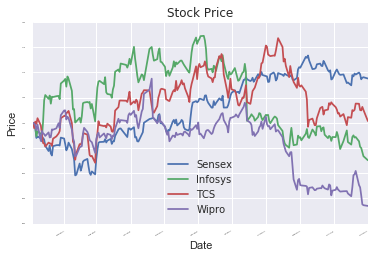

In [277]:
plot_data(df1)

### It seems none of the IT stocks outperformed Sensex. TCS among the three has performed better.

In [278]:
df = stock

In [279]:
df.mean()

Sensex     26337.796336
Infosys     1121.147574
TCS         2439.377778
Wipro        532.034854
dtype: float64

In [280]:
df.median()

Sensex     26524.550781
Infosys     1122.828440
TCS         2436.195000
Wipro        541.135380
dtype: float64

In [281]:
df.std()

Sensex     1644.000747
Infosys      68.928438
TCS         124.194172
Wipro        29.770354
dtype: float64

## Bolinger Bands - moving average and rolling statistics re-visited

In [282]:
rolling_mean_Infosys = pd.rolling_mean(df['Infosys'],window = 20)

C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':


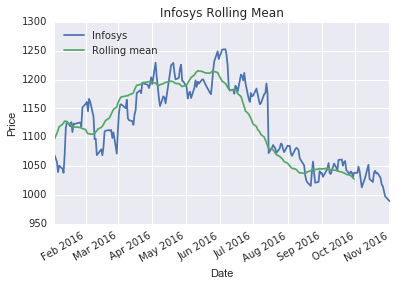

In [283]:
ax = df['Infosys'].plot(title = 'Infosys Rolling Mean', label = 'Infosys')
rolling_mean_Infosys.plot(label = 'Rolling mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')
plt.show()

## Function to calculate rolling mean, rolling standard deviation and bolinger band

In [284]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd
    return upper_band, lower_band


In [285]:
rolling_standard_Infosys = get_rolling_std(df['Infosys'], 20)

C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


In [286]:
upper_band_Infosys, lower_band_Infosys = get_bollinger_bands(rolling_mean_Infosys, rolling_standard_Infosys)

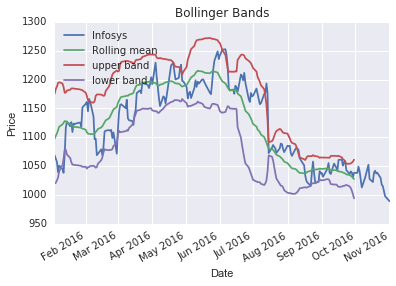

In [287]:
ax = df['Infosys'].plot(title="Bollinger Bands", label='Infosys')
rolling_mean_Infosys.plot(label='Rolling mean', ax=ax)
upper_band_Infosys.plot(label='upper band', ax=ax)
lower_band_Infosys.plot(label='lower band', ax=ax)

    # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()


### It is believed that price below bollinger band is a buying opportunity where as price above bollinger band is
### a selling opportunity. There is no proof as such.

### Let us apply exponential weighted moving average to see the trend again since there is an upward trend till 
### June and then a downward trend. 

In [288]:
infosys = df[["Infosys"]]
expweighted_infy = pd.ewma(infosys,span = 10, freq = 'D')

C:\Users\Jyoti\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=10,min_periods=0,adjust=True,freq=D).mean()
  from ipykernel import kernelapp as app


In [289]:
expweighted_infy.rename(columns={'Infosys': 'EWMA'},inplace = True)

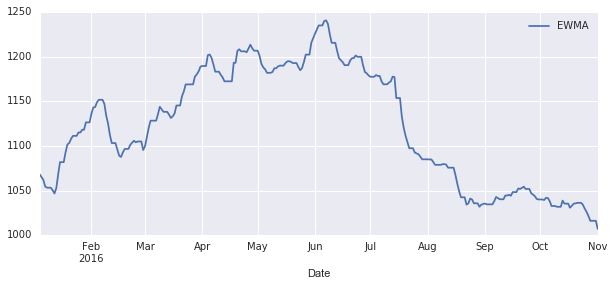

In [290]:
expweighted_infy.plot(legend=True,figsize = (10,4))

### Let us plot exponential weighted moving average value and the actual value together to further analyze.

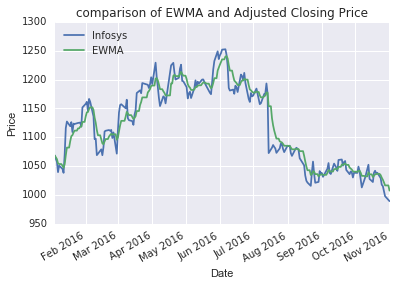

In [291]:
ax = df['Infosys'].plot(title="comparison of EWMA and Adjusted Closing Price", label='Infosys')
expweighted_infy.plot(label='EWMA', ax=ax)

    # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()


### It seems EWMA captures the trend upto a large extent except for few cases where bit of downward movement 
### is not captured. Probably, it could be noise. Let us verify whether we are getting a stationary signal after 
### subtracting the trend.

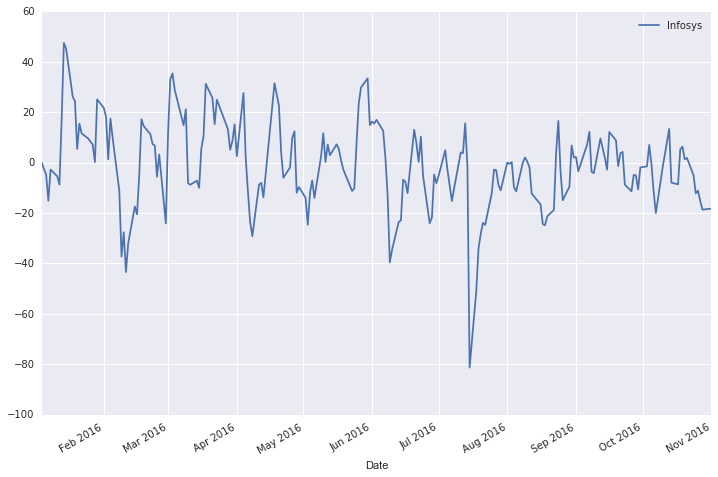

In [292]:
expweighted_infy.rename(columns = {'EWMA' : 'Infosys'}, inplace = True)
infosys_difference = infosys - expweighted_infy
infosys_difference.dropna().plot(legend=True,figsize = (12,8))

### Let us take a first order difference to reduce trend as much as we can.

In [293]:
infosys_difference = infosys_difference  - infosys_difference.shift()

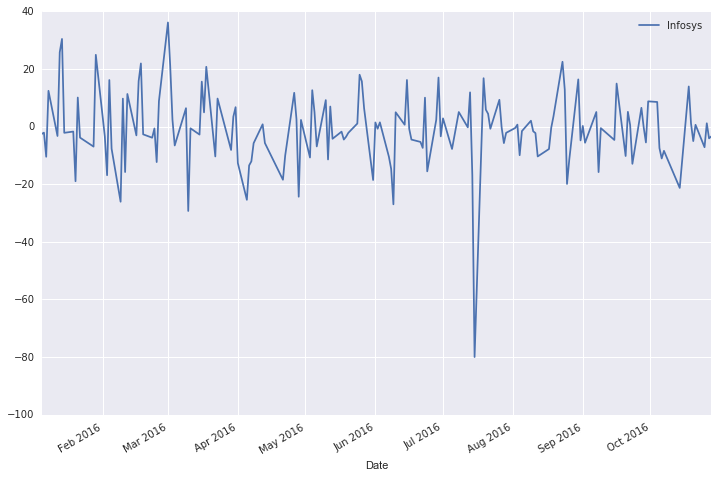

In [294]:
infosys_difference.dropna().plot(legend=True,figsize = (12,8))

### We should do a stationarity test any way to see that the trend and seasonality if any are removed.

In [295]:
from statsmodels.tsa.stattools import adfuller

In [296]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print dfoutput
test_stationarity(infosys_difference.dropna().Infosys)

Test Statistic                -1.205128e+01
p-value                        2.593962e-22
#Lags used                     0.000000e+00
Number of Observations Used    1.530000e+02
Critical Value (5%)           -2.880623e+00
Critical Value (1%)           -3.473830e+00
Critical Value (10%)          -2.576945e+00
dtype: float64


## Let us decompose the timeseries into trend and seasonlity signals.

In [297]:
infosys.head()
type(infosys)
infosys.index

DatetimeIndex(['2016-11-01', '2016-10-28', '2016-10-27', '2016-10-26',
               '2016-10-25', '2016-10-24', '2016-10-21', '2016-10-20',
               '2016-10-19', '2016-10-18',
               ...
               '2016-01-15', '2016-01-14', '2016-01-13', '2016-01-12',
               '2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04'],
              dtype='datetime64[ns]', name=u'Date', length=203, freq=None)

In [298]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(infosys.Infosys, freq = 10)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

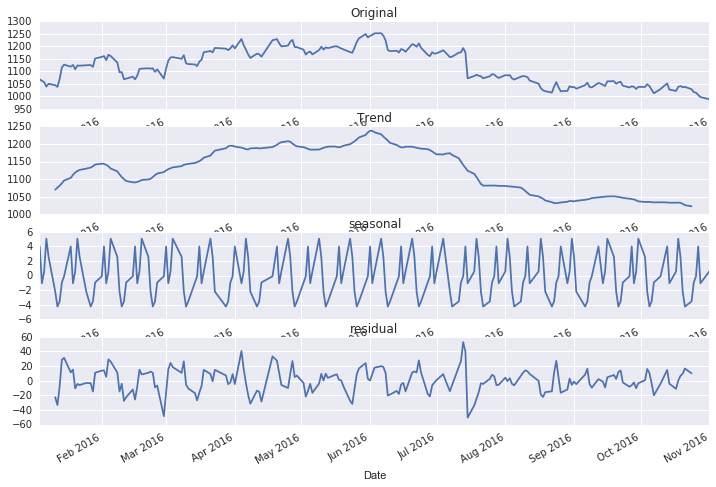

In [299]:
plt.subplot(411)
infosys['Infosys'].plot(title = 'Original', label = 'Infosys', figsize = (12,8))
plt.subplot(412)
trend.plot(title = 'Trend', label = 'Infosys', figsize = (12,8))
plt.subplot(413)
seasonal.plot(title = 'seasonal', label = 'Infosys', figsize = (12,8))
plt.subplot(414)
residual.plot(title = 'residual', label = 'Infosys', figsize = (12,8))

In [300]:
test_stationarity(residual.dropna())

Test Statistic                -7.102885e+00
p-value                        4.124273e-10
#Lags used                     1.000000e+01
Number of Observations Used    1.820000e+02
Critical Value (5%)           -2.877555e+00
Critical Value (1%)           -3.466800e+00
Critical Value (10%)          -2.575308e+00
dtype: float64


## Let us do some forecast using AR, MA and ARIMA

### Let us study the auto-correlation and partial auto correlation

In [301]:
from statsmodels.tsa.stattools import acf, pacf

In [302]:
infosys_difference.dropna(inplace=True)
lag_acf = acf(infosys_difference, nlags = 10)
lag_pacf = pacf(infosys_difference,nlags = 10, method = 'ols')

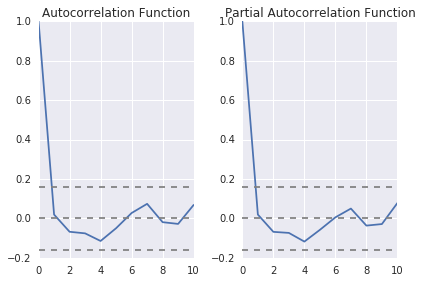

In [303]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(infosys_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(infosys_difference)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(infosys_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(infosys_difference)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [304]:
from statsmodels.tsa.arima_model import ARIMA

### AR Model

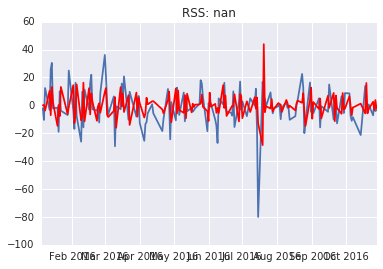

In [305]:
model = ARIMA(infosys_difference, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(infosys_difference)
plt.plot(results_AR.fittedvalues * (-1), color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-infosys_difference.Infosys)**2))

### MA model

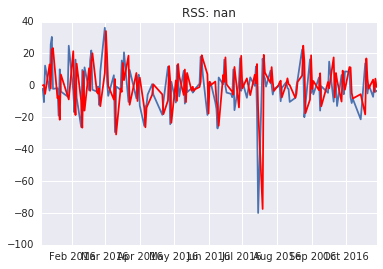

In [306]:
model = ARIMA(infosys_difference, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(infosys_difference)
plt.plot(results_MA.fittedvalues * (-1), color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-infosys_difference.Infosys)**2))

### Both Model together

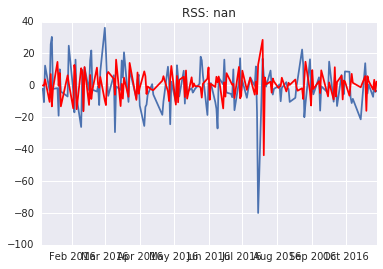

In [307]:
model = ARIMA(infosys_difference, order=(1, 1, 1))  
results_ARMA = model.fit(disp=-1)  
plt.plot(infosys_difference)
plt.plot(results_AR.fittedvalues , color='red')
plt.title('RSS: %.4f'% sum((results_ARMA.fittedvalues-infosys_difference.Infosys)**2))

### It seems MA model is better fit

## I will do the forecast in R and publish it after some days.